# Imports

In [2]:
!pip install pyalgotrading==2023.10.3

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from pyalgotrading.algobulls import AlgoBullsConnection

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Connection

In [4]:
connection = AlgoBullsConnection()

In [5]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [6]:
API_TOKEN = "f7aac5cc88a98973c64b1a618b11590112c05383"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

In [7]:
from on_balance_volume import On_Balace_Volume

In [8]:
response = connection.create_strategy(On_Balace_Volume, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 136089,
 'strategyId': '16475c5c5c464ad7ae644a20680c9cc3'}

In [9]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [10]:
instrument = connection.search_instrument('ADANI', exchange='NSE')
instrument

[{'id': 51, 'value': 'NSE:ADANIENSOL'},
 {'id': 556591, 'value': 'NSE:ADANIENSOL.BE'},
 {'id': 2770287, 'value': 'NSE:ADANIENSOL.BL'},
 {'id': 2770288, 'value': 'NSE:ADANIENSOL.IQ'},
 {'id': 2770289, 'value': 'NSE:ADANIENSOL.RL'},
 {'id': 86311, 'value': 'NSE:ADANIENT'},
 {'id': 48, 'value': 'NSE:ADANIGAS'},
 {'id': 49, 'value': 'NSE:ADANIGREEN'},
 {'id': 556589, 'value': 'NSE:ADANIGREEN.BE'},
 {'id': 15, 'value': 'NSE:ADANIPORTS'}]

## Setup Parameters

In [11]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [12]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [13]:
parameters = {
  'TIME_PERIOD': 12
}

In [14]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [15]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:ADANIPOWER', 
    lots=20,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'On-balance Volume' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ On-balance Volume         │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:ADANIPOWER']        │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 20                        │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 12}       │
├─────────────────────────┼───────────

### Status

In [16]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [17]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (3)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [18]:
print(logs)

[2023-10-31 00:19:01] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-31 00:19:01] Sanity checks on cfg successful.
[2023-10-31 00:19:01] Currency set to "INR"
[2023-10-31 00:19:01] Setting up broker connection...
[2023-10-31 00:19:03] Broker connection has been setup successfully.
[2023-10-31 00:19:03] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '4000.00'
[2023-10-31 00:19:03] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-31 00:19:03] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-31 00:19:03] Reading strategy...
[2023-10-31 00:19:03] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   #  

### Stop

In [19]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [20]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,ADANIPOWER,2021-08-02 10:15:00+05:30,BUY,20,₹,97.20,,2021-08-02 13:15:00+05:30,SELL,20,₹,92.50,,-94.0,-94.0,0,-94.0
1,NSE,ADANIPOWER,2021-08-02 13:15:00+05:30,SELL,20,₹,92.50,,2021-08-02 15:30:00+05:30,BUY,20,₹,92.60,,-2.0,-96.0,0,-2.0
2,NSE,ADANIPOWER,2021-08-06 10:15:00+05:30,BUY,20,₹,89.40,,2021-08-06 15:30:00+05:30,SELL,20,₹,92.55,,63.0,-33.0,0,63.0
3,NSE,ADANIPOWER,2021-08-10 14:15:00+05:30,SELL,20,₹,85.85,,2021-08-10 15:30:00+05:30,BUY,20,₹,85.85,,0.0,-33.0,0,0.0
4,NSE,ADANIPOWER,2021-08-24 14:15:00+05:30,BUY,20,₹,77.25,,2021-08-24 15:30:00+05:30,SELL,20,₹,77.25,,0.0,-33.0,0,0.0
5,NSE,ADANIPOWER,2021-09-06 10:15:00+05:30,SELL,20,₹,98.00,,2021-09-06 15:30:00+05:30,BUY,20,₹,98.00,,0.0,-33.0,0,0.0
6,NSE,ADANIPOWER,2021-09-15 10:15:00+05:30,BUY,20,₹,100.15,,2021-09-15 12:15:00+05:30,SELL,20,₹,99.30,,-17.0,-50.0,0,-17.0
7,NSE,ADANIPOWER,2021-09-15 12:15:00+05:30,SELL,20,₹,99.30,,2021-09-15 14:15:00+05:30,BUY,20,₹,99.50,,-4.0,-54.0,0,-4.0
8,NSE,ADANIPOWER,2021-09-15 14:15:00+05:30,BUY,20,₹,99.50,,2021-09-15 15:30:00+05:30,SELL,20,₹,99.70,,4.0,-50.0,0,4.0
9,NSE,ADANIPOWER,2021-09-16 10:15:00+05:30,SELL,20,₹,98.60,,2021-09-16 15:30:00+05:30,BUY,20,₹,98.60,,0.0,-50.0,0,0.0


## Statistics Reports

### Statistics

In [21]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/om/.local/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-04-19
Risk-Free Rate      0.0%
Time in Market      77.0%

Cumulative Return   10.27%
CAGR﹪              5.87%

Sharpe              0.76
Prob. Sharpe Ratio  77.23%
Sortino             1.51
Sortino/√2          1.07
Omega               1.22

Max Drawdown        -10.75%
Longest DD Days     420

Gain/Pain Ratio     0.25
Gain/Pain (1M)      1.08

Payoff Ratio        2.13
Profit Factor       1.22
Common Sense Ratio  2.24
CPC Index           0.94
Tail Ratio          1.84
Outlier Win Ratio   7.5
Outlier Loss Ratio  3.95

MTD                 -0.37%
3M                  -1.64%
6M                  -1.64%
YTD                 -1.64%
1Y                  -1.64%
3Y (ann.)           5.87%
5Y (ann.)           5.87%
10Y (ann.)          5.87%
All-time (ann.)     5.87%

Avg. Drawdown       -3.99%
Avg. Drawdown Days  94
Recovery Factor     0.95
Ulcer Index         0.04
Serenity Index      0.35


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/om/.local/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-04-19
Risk-Free Rate             0.0%
Time in Market             77.0%

Cumulative Return          10.27%
CAGR﹪                     5.87%

Sharpe                     0.76
Prob. Sharpe Ratio         77.23%
Smart Sharpe               0.6
Sortino                    1.51
Smart Sortino              1.2
Sortino/√2                 1.07
Smart Sortino/√2           0.85
Omega                      1.22

Max Drawdown               -10.75%
Longest DD Days            420
Volatility (ann.)          16.77%
Calmar                     0.55
Skew                       2.48
Kurtosis                   16.09

Expected Daily %           0.05%
Expected Monthly %         0.89%
Expected Yearly %          3.31%
Kelly Criterion            6.49%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.69%
Expected Shortfall (cVaR)  -1.69%

Max Consecutive Wins       4


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-02-23,2023-03-17,2023-04-19,420,-10.751748,-10.511364
2,2021-09-20,2022-01-10,2022-01-12,113,-6.356784,-5.778894
3,2022-01-13,2022-02-04,2022-02-10,28,-6.164554,-5.741984
4,2021-09-15,2021-09-15,2021-09-17,2,-0.529367,-0.428535
5,2022-02-18,2022-02-18,2022-02-18,0,-0.066534,0.000000


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


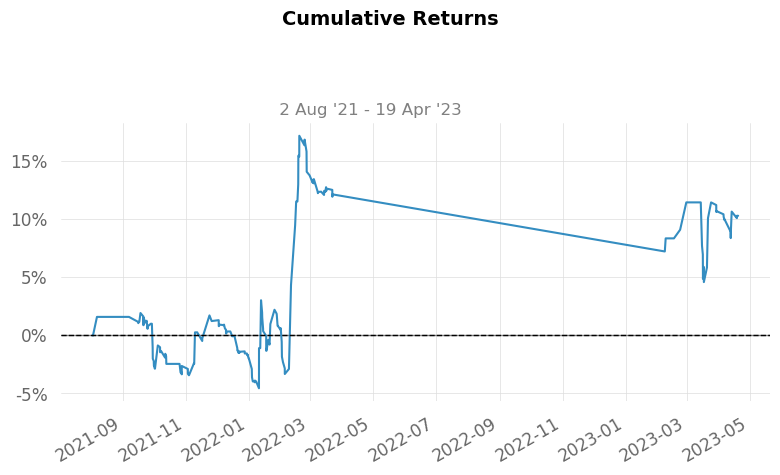

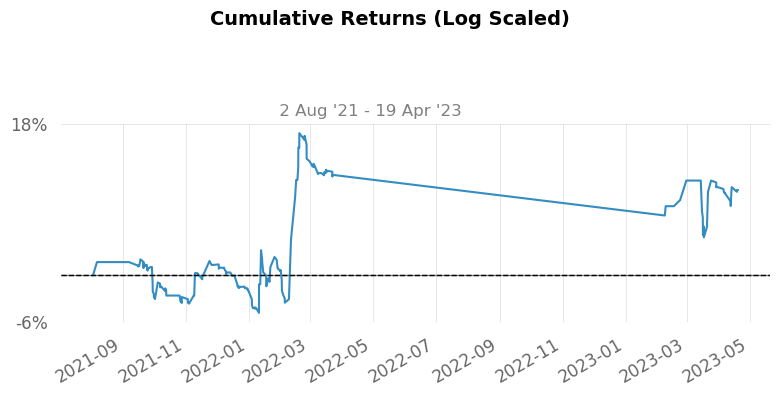

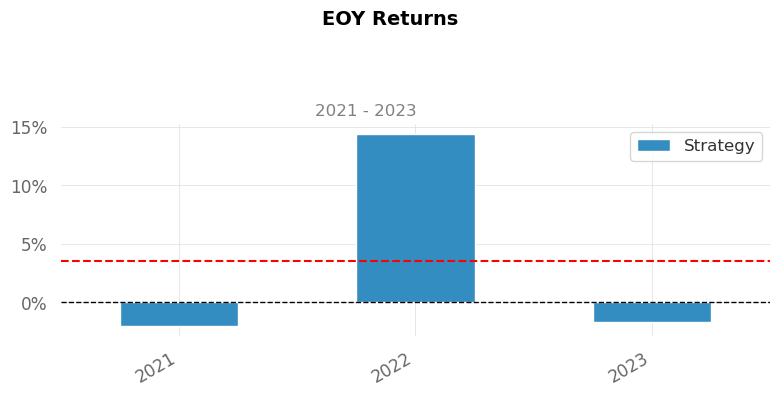

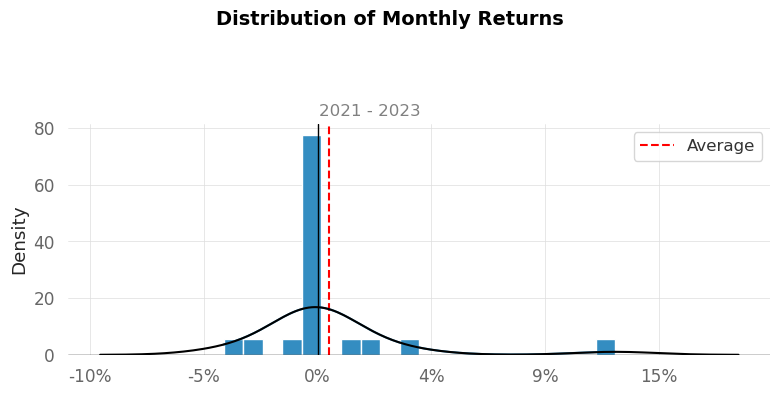

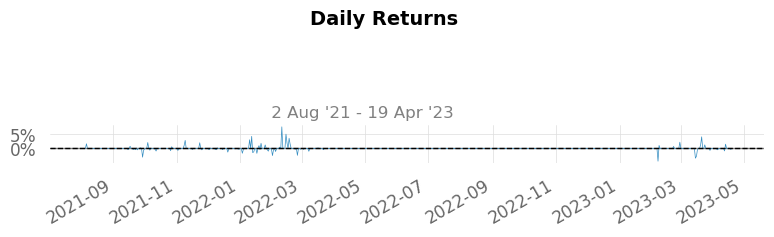

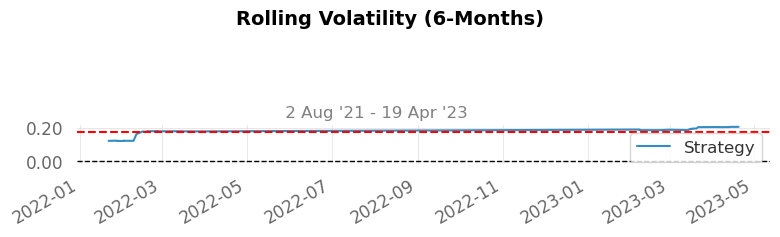

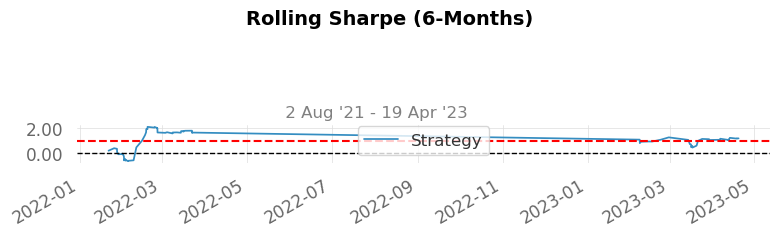

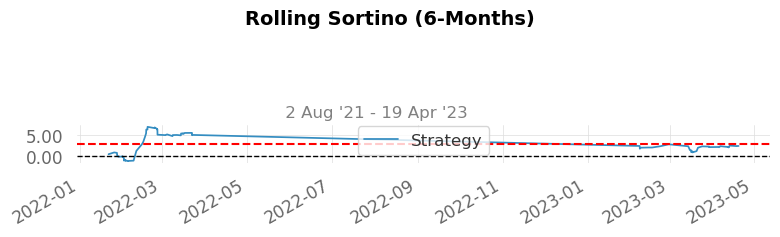

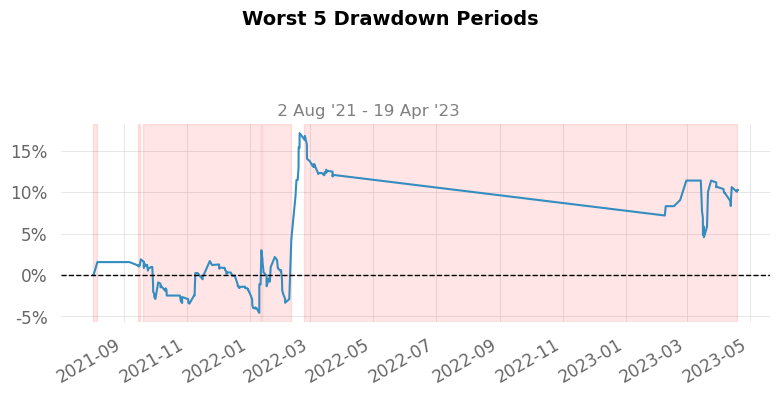

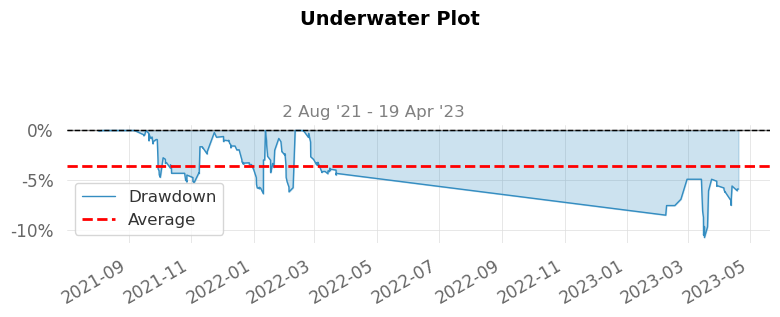

/home/om/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


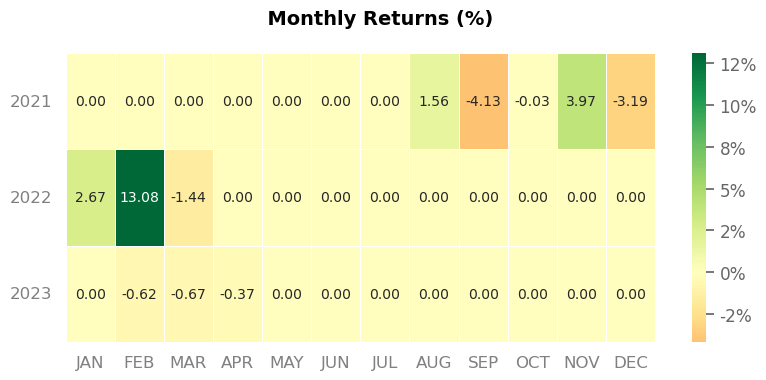

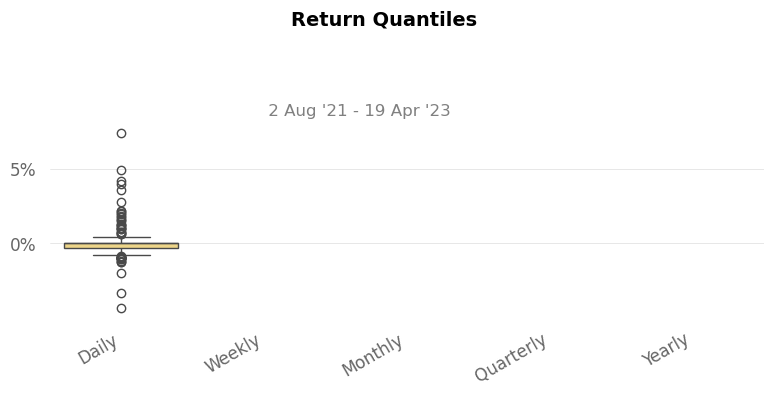

/home/om/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [22]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [23]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | f3b02671e9774878a14aebb3a94d5466 |
| Transaction Type | SELL                             |
| Instrument       | NSE:ADANIPOWER                   |
| Quantity         | 20                               |
| Price            | ₹187.55                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-30T18:50:40.848501Z | COMPLETE               |
| 2023-10-30T18:50:40.848484Z | OPEN                   |
| 2023-10-30T18:50:40.848466Z | OPEN PENDING           |
| 2023-10-30T18:50:40.848446Z | VALIDATION PENDING     |
| 2023-10-30T18:50:40.848403Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | a50e6dfe6191475fa